In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import sklearn
from sklearn.metrics import mean_squared_error
from scipy.stats import variation
from datetime import datetime
from pylab import rcParams
import statsmodels.api as sm


In [82]:
df = pd.read_csv('Alcohol_Sales.csv')

In [83]:
df = df.set_index('date')
df.head()

,sales
date,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [84]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,sales
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
90%,11906.200000
95%,12865.400000
99%,14383.560000


/home/local/FARFETCH/hugomiguel.dias/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


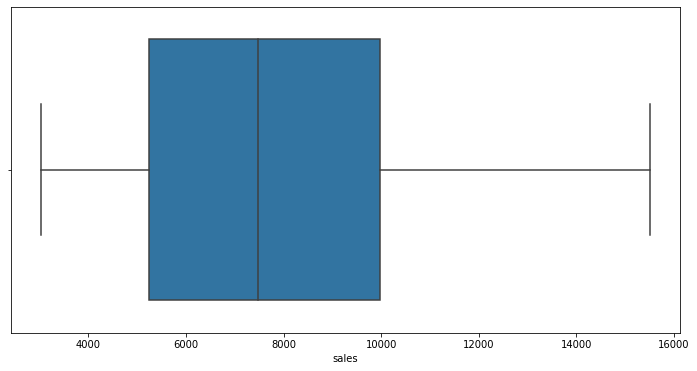

In [85]:
plt.figure(figsize=(12,6))
sns.boxplot(df['sales'])
plt.show()

In [86]:
train_len = round(len(df['sales']) / 2)

In [87]:
train_data = df[0 : train_len]
test_data = df[train_len : ]

In [88]:
train_data.shape

(162, 1)

In [89]:
test_data.shape

(163, 1)

In [90]:
df.head

<bound method NDFrame.head of             sales
date             
1992-01-01   3459
1992-02-01   3458
1992-03-01   4002
1992-04-01   4564
1992-05-01   4221
...           ...
2018-09-01  12396
2018-10-01  13914
2018-11-01  14174
2018-12-01  15504
2019-01-01  10718

[325 rows x 1 columns]>

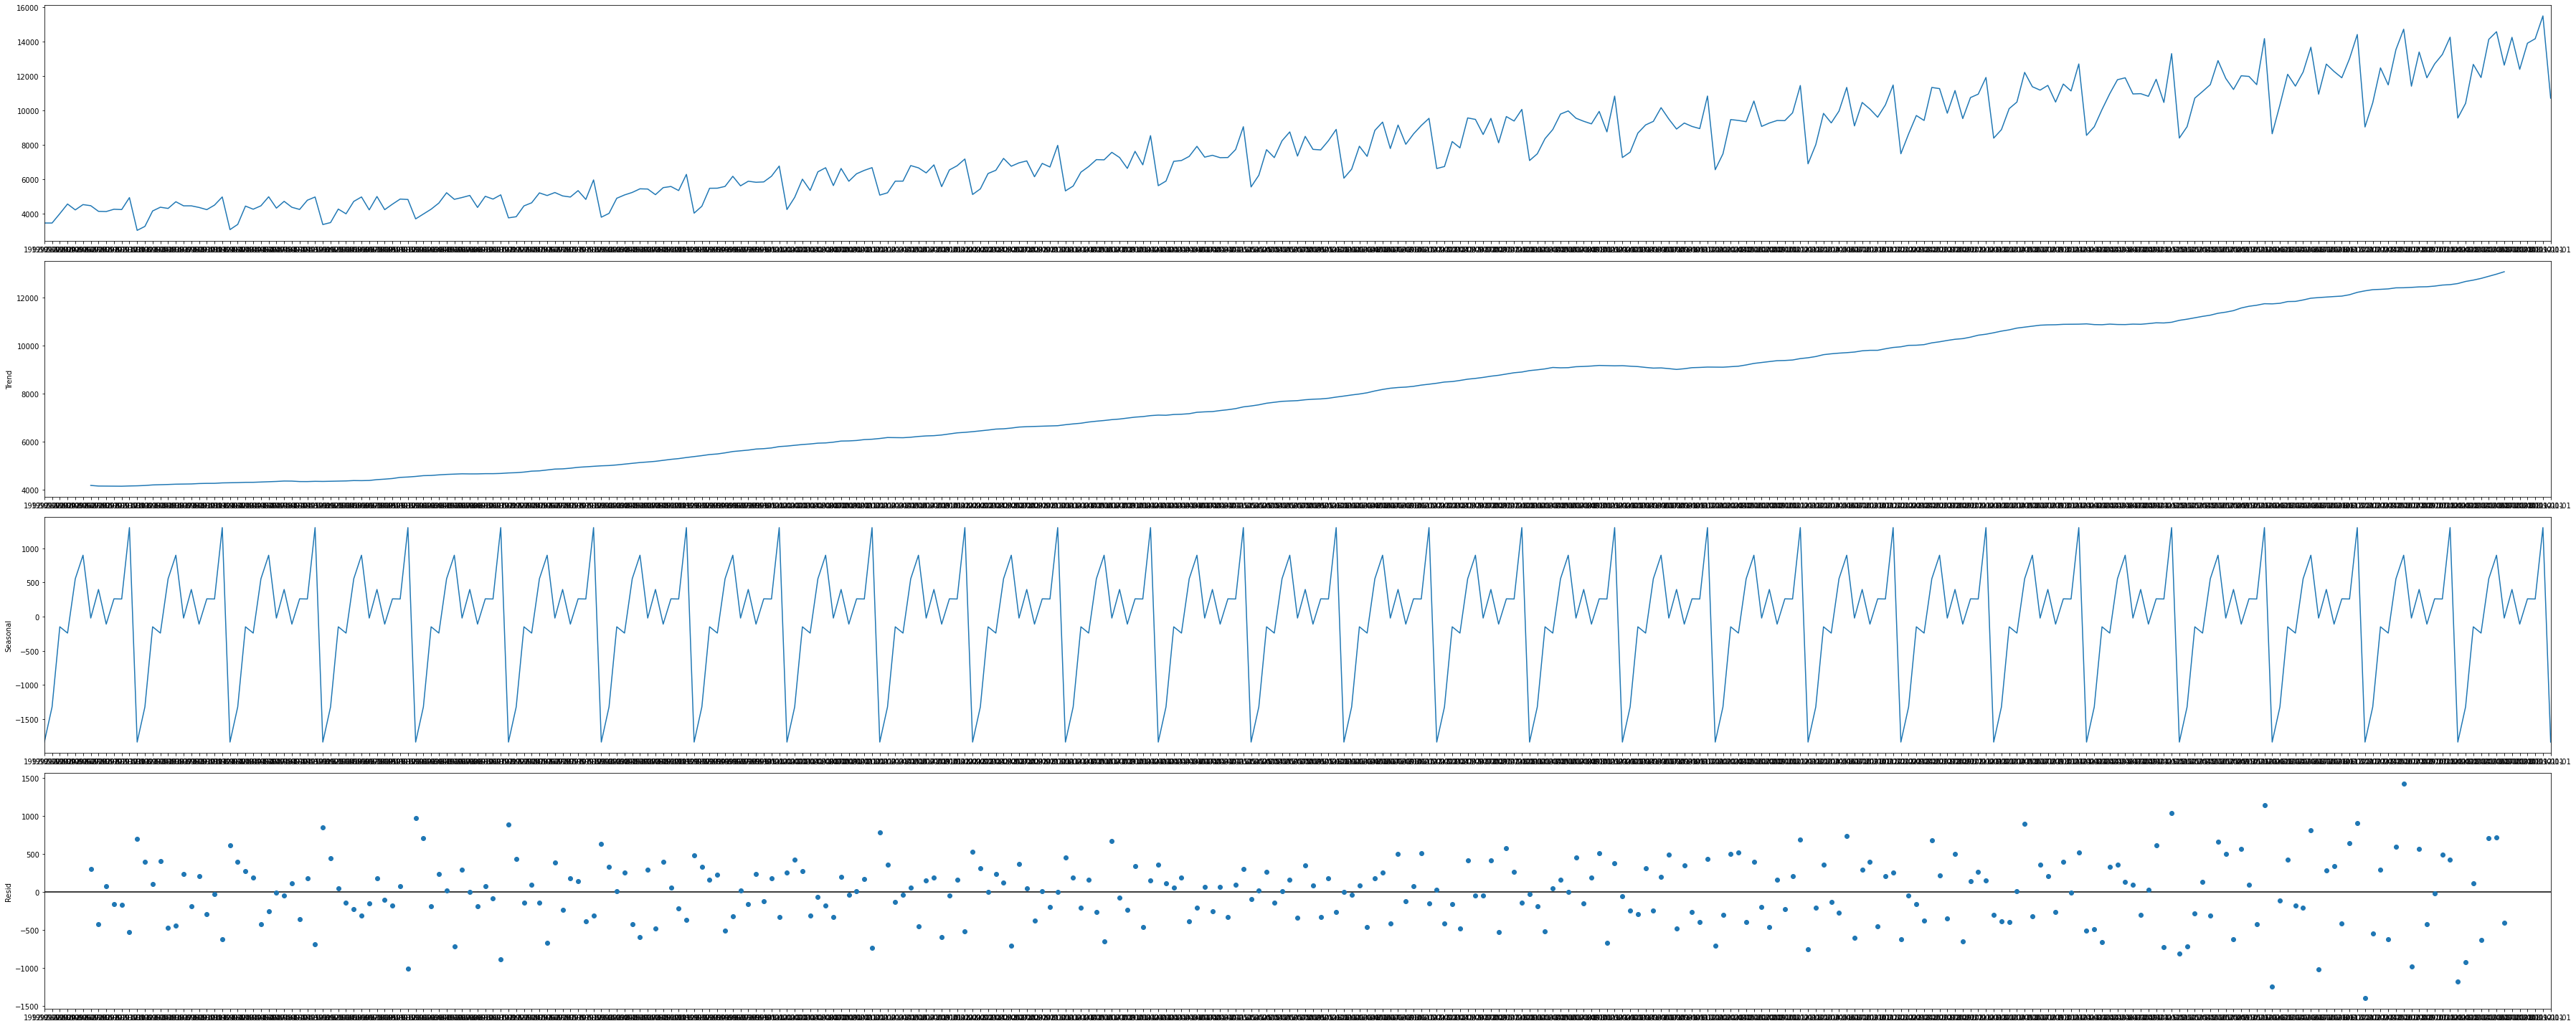

In [91]:
rcParams['figure.figsize'] = 50, 20
decomposition = sm.tsa.seasonal_decompose(df, period=12, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()